
# Video Games Sales Analysis

In this project I will use the video games sales data for analysis. I will try to gain useful insights from this dataset and improve my skills while doing so. This analysis is part of the Zero to Pandas course offered by Jovian ML and FreecodeCamp.

## Downloading the Dataset

The dataset can be obtained from this kaggle link:  https://www.kaggle.com/gregorut/videogamesales/notebooks
This dataset contains a list of video games with sales greater than 100,000 copies. It has sales record for North America, Europe, Japan and rest of the world in millions. Though we can conclude that some countries must have been excluded but it is not clear.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales/notebooks' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aditya7jetely
Your Kaggle Key: ········


100%|██████████| 381k/381k [00:00<00:00, 46.9MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './videogamesales'


In [5]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "video-game-sales-analysis" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "ajetely/video-game-sales-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ajetely/video-game-sales-analysis


'https://jovian.ml/ajetely/video-game-sales-analysis'

## Data Preparation and Cleaning

This is the main step before the data analysis portion . In this step I will try to make the dataset ready for analysis , i.e. I would choose useful columns, handle missing or incorrect values and would perform parsing if necessary.



In [10]:
import pandas as pd

Loading the dataset into a pandas dataframe

In [11]:
video_sales_df = pd.read_csv('./videogamesales/vgsales.csv')
video_sales_df.head() # Having a look at the first five rows of the dataframe

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Evaluating the shape of our dataframe

In [12]:
video_sales_df.shape

(16598, 11)

We can see that our dataset has 16598 rows and 11 columns

List of columns in our dataframe

In [13]:
video_sales_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

As the number of columns in our dataset is not very high we can use all the columns to some extend

Now lets see some basic information about our dataset

In [14]:
video_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


As we can obsereve in the above result that the year column has the data type as float which should have been datetime, so we must convert it into datetime by the help of pandas functions.

In [15]:
video_sales_df['Year'] =  pd.to_datetime(video_sales_df['Year'], format='%Y', errors='coerce')

Now we can confirm the data type of Year columnn

In [16]:
video_sales_df.dtypes

Rank                     int64
Name                    object
Platform                object
Year            datetime64[ns]
Genre                   object
Publisher               object
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object

We can see that the data type of our Year column is now datetime

Now let us have some stats about the numeric columns of our data set

In [17]:
video_sales_df.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


As we see that our Rank column is also numeric but it is not meaningful to perform statistics on it so we must remove it from the statistics info

In [18]:
video_sales_df_copy = video_sales_df.copy() # A copy dataframe to remove Rank column from statistical description

In [19]:
video_sales_df_copy.drop(columns = 'Rank', inplace = True) # droping the rank column

In [20]:
video_sales_df_copy.describe() # Now we dont have the Rank column in the statistical info

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


There doesn't seem to be any problem with our numeric columns as of now. It is to be noted that al the sales are in millions

In [21]:
import jovian

In [22]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ajetely/video-game-sales-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ajetely/video-game-sales-analysis


'https://jovian.ml/ajetely/video-game-sales-analysis'

## Exploratory Analysis and Visualization

Before we can ask interesting questions about the dataset it would help to understand what the differnt coluns of our dataset looks like. 



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Genre

Lets explore the genre column of our dataframe to see what is the majority of games whose sales record are present

In [24]:
video_sales_df.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

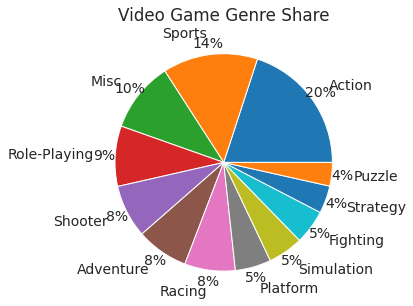

In [25]:
plt.pie(video_sales_df.Genre.value_counts(), labels=video_sales_df.Genre.value_counts().index, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Video Game Genre Share')
plt.ylabel(' ')
plt.show()

Action games have the highest count in the dataset will the Puzzle games have the least count. It could be due to the fact that many people are interested in video games that involve action in them as many consider puzzle based to be boring.

## Platform

Lets analyse the number of games based on the platform

In [26]:
video_sales_df.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

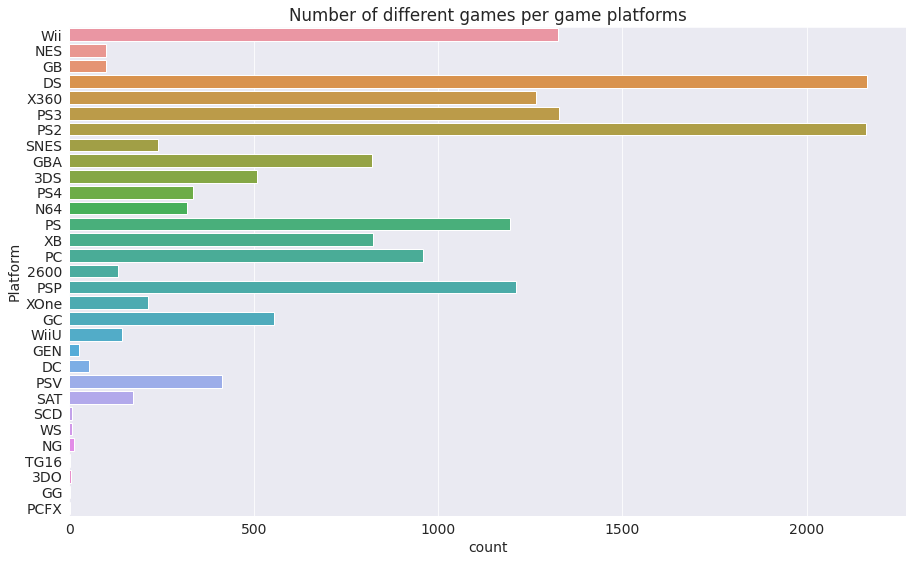

In [27]:
plt.figure(figsize = (15,9))
plt.title('Number of different games per game platforms')
sns.countplot(y='Platform', data=video_sales_df)
plt.show()

The most games are available for the DS and PS2 platforms which might mean that DS and PS2 are used by more customers But we cant be sure about that.


## Publisher

Lets analyse the Publisher column to see which company publishes the what number of games. Lets consider publishers with game counts above 100 only .

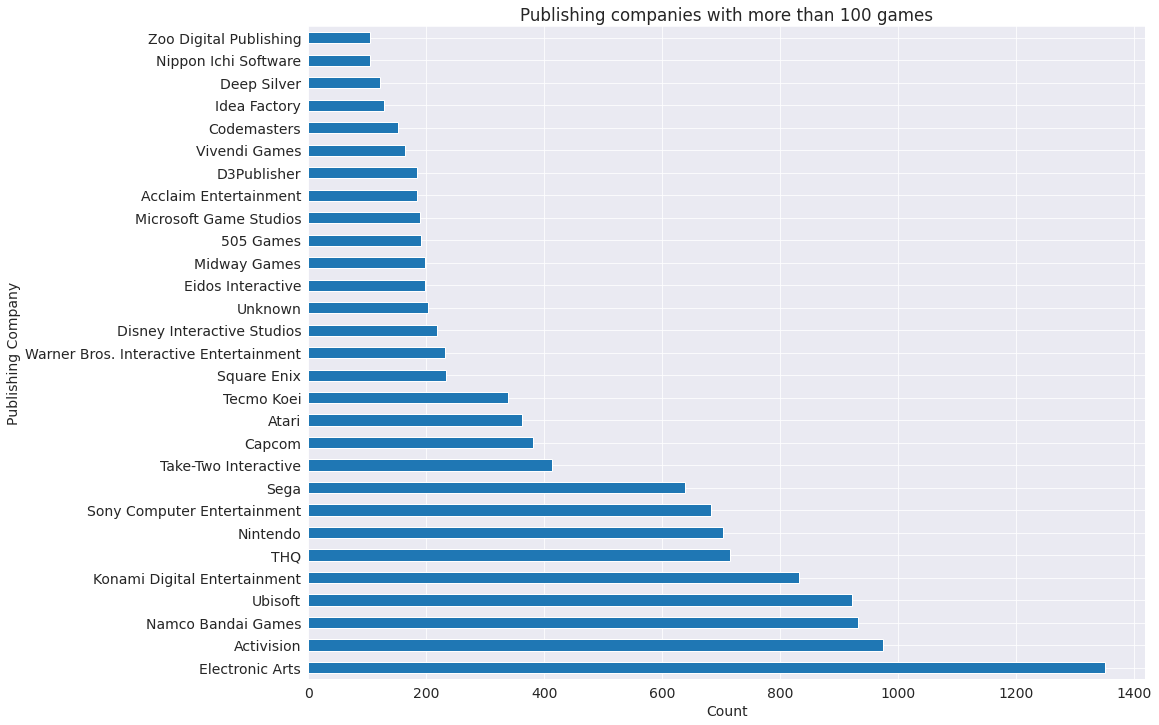

In [28]:
plt.figure(figsize=(15,12))
publishers = video_sales_df.Publisher.value_counts()
publishers = publishers[publishers.values > 100]
publishers.plot(kind = 'barh')
plt.xlabel('Count')
plt.ylabel('Publishing Company')
plt.title('Publishing companies with more than 100 games')
plt.show()

We see that Electronics Arts is the undisputed leader in terms of the video games sale count. One of the reason maybe the popularity of its sports based games like FIFA and Cricket

## Year

In [29]:
video_sales_df['Year'].value_counts().sort_values(ascending=False)
video_sales_df['year_only'] = video_sales_df['Year'].dt.year
video_sales_df['year_only'] = video_sales_df['year_only'].astype(int, errors='ignore')

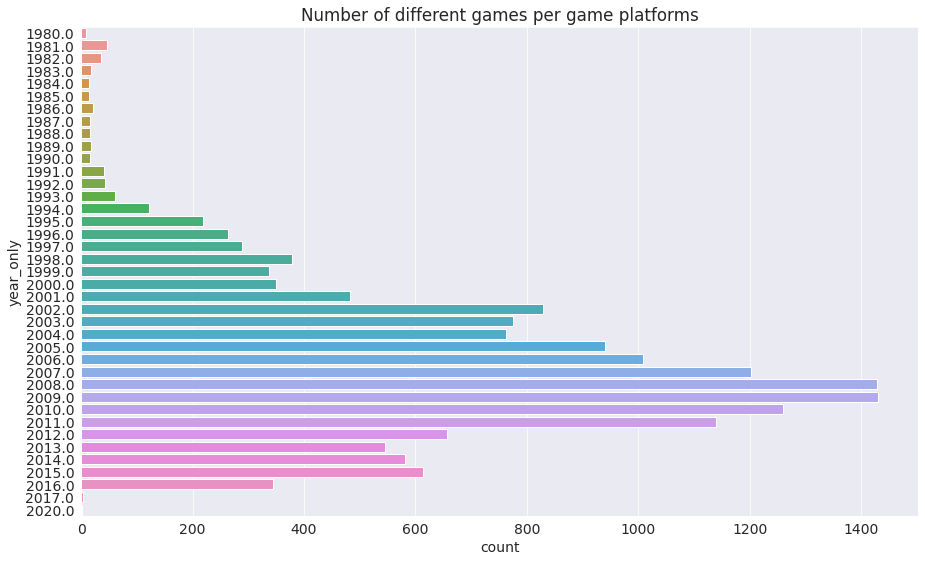

In [30]:
plt.figure(figsize = (15,9))
plt.title('Number of different games per game platforms')
sns.countplot(y='year_only', data=video_sales_df)
plt.show()

We can see that the sales were the higest in the years 2006 to 2011 and after that we can see a downfall of the total sales

## Sales

Lets analyse the numeric sales column for North America, Europe, Japan and Rest of the World


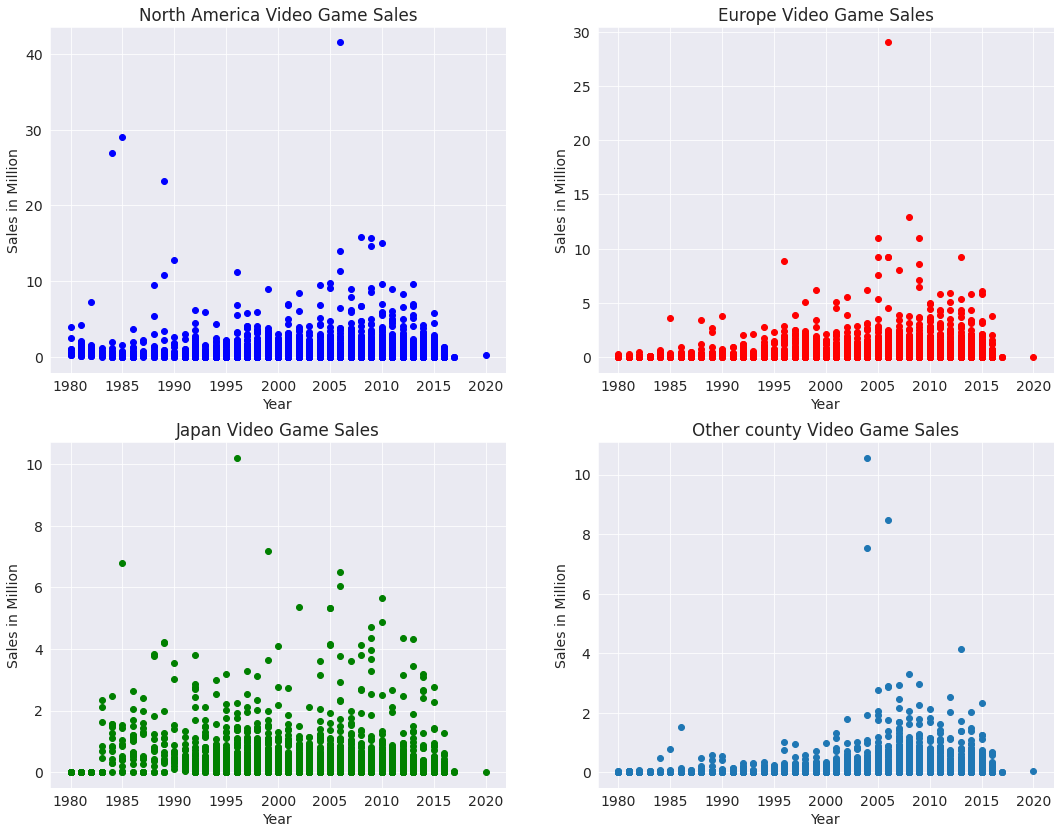

In [31]:
fig, axes = plt.subplots(2,2, figsize= (18, 14))
axes[0, 0].scatter(video_sales_df.year_only, video_sales_df.NA_Sales, color = 'b')
axes[0, 0].set_title('North America Video Game Sales')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Sales in Million')
axes[0, 1].scatter(video_sales_df.year_only, video_sales_df.EU_Sales, color = 'r')
axes[0, 1].set_title('Europe Video Game Sales')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Sales in Million')
axes[1, 0].scatter(video_sales_df.year_only, video_sales_df.JP_Sales, color = 'g')
axes[1, 0].set_title('Japan Video Game Sales')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Sales in Million')
axes[1, 1].scatter(video_sales_df.year_only, video_sales_df.Other_Sales)
axes[1, 1].set_title('Other county Video Game Sales')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Sales in Million')
plt.show()

In the above visualization we saw the video game sales in the four different regions, the outliers in all the four regions are very few.  We can see that the sales have a higher number in the North American region.

Let us save and upload our work to Jovian before continuing

In [32]:
import jovian

In [33]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ajetely/video-game-sales-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ajetely/video-game-sales-analysis


'https://jovian.ml/ajetely/video-game-sales-analysis'

## Asking and Answering Questions

We've already gained several insights about the dataset and video game sales in different regions , let us further improve our insights by asking some interesting questions.


#### Q1: What are the top five game genres?

In [40]:
video_sales_df.Genre.value_counts().head(5)

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: Genre, dtype: int64

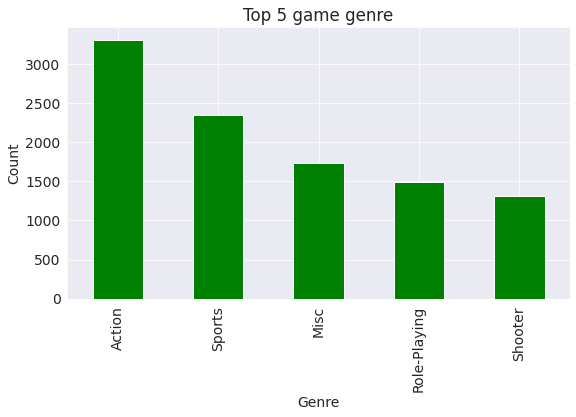

In [41]:
video_sales_df.Genre.value_counts().head(5).plot(kind = 'bar', color = 'g')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 5 game genre')
plt.show()

**Action** and **Sports** are the top grossing genres of video games followed by **miscellaneous**, **role-playing** and **shooting** games. This also shows why Electronics Art has a large share in the sales because it manily makes sports based games.

#### Q2: Which region has the largest share in the global video games sales?

In [45]:
Total_Video_Games_Sales = video_sales_df.Global_Sales.sum()
North_America_Sales_percent = (video_sales_df.NA_Sales.sum()*100)/Total_Video_Games_Sales
Europe_Sales_percent = (video_sales_df.EU_Sales.sum()*100)/Total_Video_Games_Sales
Japan_Sales_percent = (video_sales_df.JP_Sales.sum()*100)/Total_Video_Games_Sales
Other_Region_Sales_percent = (video_sales_df.Other_Sales.sum()*100)/Total_Video_Games_Sales

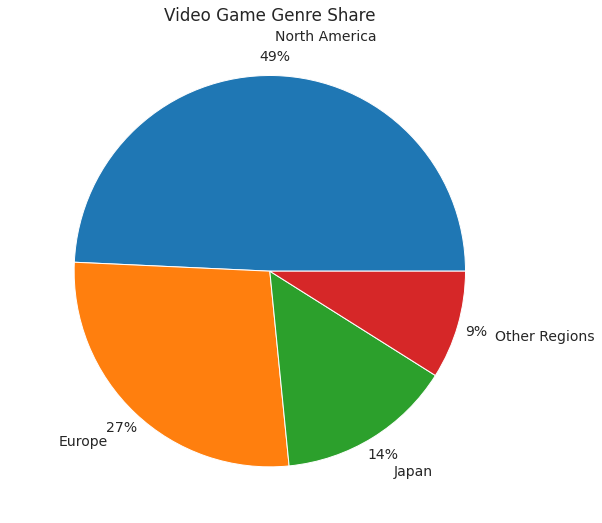

In [78]:
plt.figure(figsize=(16,9))
plt.pie([North_America_Sales_percent, Europe_Sales_percent, Japan_Sales_percent, Other_Region_Sales_percent], labels=['North America', 'Europe', 'Japan', 'Other Regions'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Video Game Genre Share')
plt.ylabel(' ')
plt.show()

Through this pie chart we see that the major share holder is **North America**. Though this result can be bit biased becuase of the nature of the survey in which more importance might have been given to the North American area.

#### Q3: What are top 5 highest grossing games in North America ?

In [56]:
video_sales_NA_sorted_df = video_sales_df.sort_values(by = ['NA_Sales'], ascending = False)
video_sales_NA_sorted_df.head()[['Name', 'NA_Sales']]

,Name,NA_Sales
0,Wii Sports,41.49
1,Super Mario Bros.,29.08
9,Duck Hunt,26.93
5,Tetris,23.20
2,Mario Kart Wii,15.85


The top grossing game in North America is **Wii Sports** with a total sales of 41.49 millions in North America followed by Super Mario Bros., Duck Hunt, Tetris and Mario Kart Wii.

#### Q4: Which game has the highest sales in the other region(Exluding North America, Europe and Japan)?

In [66]:
video_sales_Other_sorted_df = video_sales_df.sort_values(by = ['Other_Sales'], ascending = False)
video_sales_NA_sorted_df.head(1)[['Name', 'Other_Sales']]

,Name,Other_Sales
17,Grand Theft Auto: San Andreas,10.57


**GTA: San Andreas** has the highest sales in the other regions which is 10.57 millions.

#### Q5: Which game has the highest difference in their sales in North America and Europe?

In [68]:
video_sales_df['NA_EU_Sales_Diff'] = abs(video_sales_df['NA_Sales'] - video_sales_df['EU_Sales'])
video_sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,year_only,NA_EU_Sales_Diff
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006.0,12.47
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985.0,25.50
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2008.0,2.97
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009.0,4.74
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1996.0,2.38


In [72]:
video_sales_df.sort_values(by = ['NA_EU_Sales_Diff'], ascending = False).head(1)[['Name', 'NA_EU_Sales_Diff']]

,Name,NA_EU_Sales_Diff
9,Duck Hunt,26.3


**Duck Hunt** has the highest difference in their sales when comparison is made between North America and Europe.

Let us save and upload our work to Jovian before continuing.

In [73]:
import jovian

In [74]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ajetely/video-game-sales-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ajetely/video-game-sales-analysis


'https://jovian.ml/ajetely/video-game-sales-analysis'

## Inferences and Conclusion

- Based on this dataset we cant say that equal importance was given to all the regions of the world as it might be the case that the data was collected mostly from North American stores.
- Games in the Action genre tend to fetch the most revenue followed by Sports based games.
- Electronic Arts is the top grossing publisher clearly beacuse of their supper popular sports based games.
- GTA : San Andreas is the top grossing game in the other Regions of the World.
- Top grossing game in North America is Wii Sports.
- Duck Hunt has the highest difference in the sales made in Europe and North America which shows it is more popular in North America when compared with Europe.
- These stats can be a bit biased based on the nature of data collection.

In [76]:
import jovian

In [77]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ajetely/video-game-sales-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ajetely/video-game-sales-analysis


'https://jovian.ml/ajetely/video-game-sales-analysis'

## References and Future Work

This dataset has a lot of information about the sales trend of video games which can be further exploited to gain useful insights.

- A region based analysis can be performed in depth to compare video games sales tredn


References:

- Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- opendatasets Python library: https://github.com/JovianML/opendatasets

In [32]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'